In [1]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
X_data = boston_df.drop(['Target'], axis=1, inplace=False)
y_target = boston_df['Target']

In [4]:
#@title
rf = RandomForestRegressor(n_estimators=1000)

n_mse = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
avg_rmse = np.mean(np.sqrt(-1*n_mse))
print('평균 RMSE : ', np.round(avg_rmse,3))

평균 RMSE :  4.404


In [5]:
def model_prediction(model, X_data, y_target):
  n_mse = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*n_mse))
  print('######', model.__class__.__name__, '######')
  print('평균 RMSE : ', np.round(avg_rmse,3))

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
tree_r = DecisionTreeRegressor(max_depth=4)
rf = RandomForestRegressor(n_estimators=1000)
gb_r = GradientBoostingRegressor(n_estimators=1000)
xgb = XGBRegressor(n_estimators=1000)
lgbm = LGBMRegressor(n_estimators=1000)

models = [tree_r, rf, gb_r, xgb, lgbm]
for model in models:
  model_prediction(model, X_data, y_target)

###### DecisionTreeRegressor ######
평균 RMSE :  5.894
###### RandomForestRegressor ######
평균 RMSE :  4.42
###### GradientBoostingRegressor ######
평균 RMSE :  4.231
[05:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
###### XGBRegressor ######
평균 RMSE :  4.089
###### LGBMRegressor ######
평균 RMSE :  4.646


**회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있습니다.**

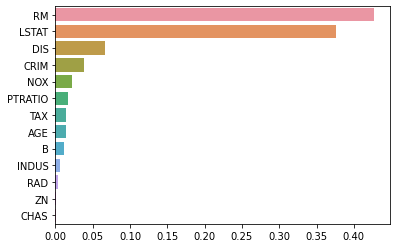

In [8]:
import seaborn as sns

rf = RandomForestRegressor(n_estimators=1000)

rf.fit(X_data, y_target)

features = pd.Series(data=rf.feature_importances_, index=X_data.columns)
features = features.sort_values(ascending=False)
sns.barplot(x = features, y = features.index)

**오버피팅을 시각화 하기 위해 한개의 피처 RM과 타겟값 PRICE기반으로 회귀 예측 수행**

(100, 2)


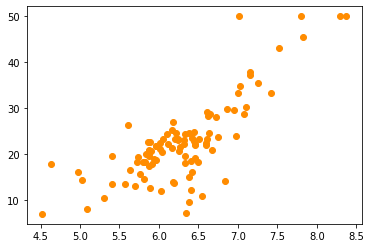

In [13]:
import matplotlib.pyplot as plt

boston_df_RM = boston_df[['RM', 'Target']]
boston_df_RM = boston_df_RM.sample(n=100)
print(boston_df_RM.shape)
plt.figure()
plt.scatter(boston_df_RM['RM'], boston_df_RM['Target'], c='darkorange')

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = boston_df_RM['RM'].values.reshape(-1,1)
y_target = boston_df_RM['Target'].values.reshape(-1,1)
print(y_target.shape, X_feature.shape)

# 학습과 예측 수행. 
lr.fit(X_feature, y_target)
tree_2.fit(X_feature, y_target)
tree_7.fit(X_feature, y_target)

lr_pred = lr.predict(X_test)
tree_2_pred = tree_2.predict(X_test)
tree_7_pred = tree_7.predict(X_test)

(100, 1) (100, 1)


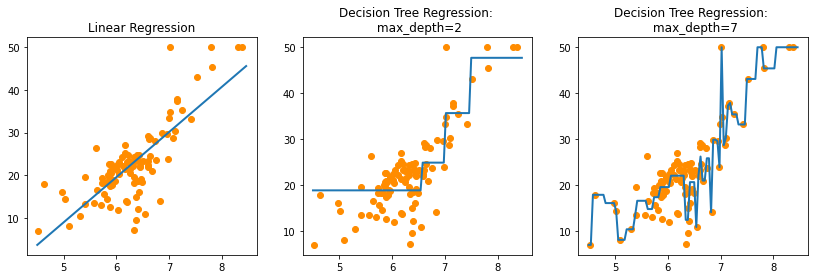

In [16]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(boston_df_RM['RM'], boston_df_RM['Target'], c='darkorange')
ax1.plot(X_test, lr_pred,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(boston_df_RM['RM'], boston_df_RM['Target'], c='darkorange')
ax2.plot(X_test, tree_2_pred, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_df_RM['RM'], boston_df_RM['Target'], c='darkorange')
ax3.plot(X_test, tree_7_pred, label="max_depth:7", linewidth=2)